In [1]:
# VGG-19 Code for Final Project IE 590
# Keras implementation of VGG16
# Kristiaan Hector

# First we need to import the appropriate libraries
#--------------------------------------------------------------------------------------------------
# This ensures compatibility
# import tensorflow.python.keras import backend as K
import tensorflow.keras 

# Import libraries for reading and processing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Import the VGG-16 model from keras
from tensorflow.python.keras.applications.vgg19 import VGG19, preprocess_input

# import numpy
import numpy as np
#--------------------------------------------------------------------------------------------------

In [2]:
# Next, we need to define a few important things

DATASET_PATH  = './weed_data'                                       # set the path to the data set
IMAGE_SIZE    =  (300,300)                                            # set the image size
NUM_CLASSES   = 4                                                     # we have 4 different classes 
BATCH_SIZE    = 8                                                    # set the batch size
NUM_EPOCHS    = 70                                                    # set the number of epochs
WEIGHTS_FINAL = 'model-vgg19-final.h5'                                # save weights after training


In [3]:
# Now let's add some data augmentation to our images to see if we can combat this overfitting
# problem...

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# define the training data
train_batches = train_datagen.flow_from_directory(DATASET_PATH+'/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)
                                                  
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# now define the validation data
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH+'/val',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 270 images belonging to 4 classes.
Found 91 images belonging to 4 classes.


In [3]:
# create a new VGG model
# vgg16 model set up
model = VGG19(weights=None,
              input_tensor=None,
              input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
              pooling='max',
              classes=NUM_CLASSES)

In [4]:
# Next, we need to ensure that all of the layers in our model are trainable
for layer in model.layers:
    layer.trainable = True

In [4]:
# Now we need to set up the optimizer for the model
# Let's use Adam...
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
# Make a usable summary of our model's training and validation
print(model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [7]:
# Finally, let's train the model
hist = model.fit_generator(train_batches,
                     steps_per_epoch = train_batches.samples // BATCH_SIZE,
                     validation_data = valid_batches,
                     validation_steps = valid_batches.samples //BATCH_SIZE,
                     epochs = NUM_EPOCHS)

Epoch 1/70
33/33 [==============================] - 32s 970ms/step - loss: 1.3659 - accuracy: 0.3511 - val_loss: 1.3319 - val_accuracy: 0.3864
Epoch 2/70
33/33 [==============================] - 26s 796ms/step - loss: 1.3204 - accuracy: 0.3893 - val_loss: 1.3037 - val_accuracy: 0.3864
Epoch 3/70
33/33 [==============================] - 27s 808ms/step - loss: 1.2209 - accuracy: 0.4542 - val_loss: 0.9870 - val_accuracy: 0.6023
Epoch 4/70
33/33 [==============================] - 26s 803ms/step - loss: 1.0263 - accuracy: 0.5191 - val_loss: 0.8664 - val_accuracy: 0.6023
Epoch 5/70
33/33 [==============================] - 26s 791ms/step - loss: 1.0024 - accuracy: 0.5649 - val_loss: 0.7729 - val_accuracy: 0.6250
Epoch 6/70
33/33 [==============================] - 26s 784ms/step - loss: 0.8670 - accuracy: 0.7061 - val_loss: 0.7901 - val_accuracy: 0.6705
Epoch 7/70
33/33 [==============================] - 27s 820ms/step - loss: 0.7791 - accuracy: 0.6667 - val_loss: 0.6728 - val_accuracy: 0.6705

Epoch 58/70
33/33 [==============================] - 27s 827ms/step - loss: 0.2100 - accuracy: 0.9192 - val_loss: 0.3825 - val_accuracy: 0.8750
Epoch 59/70
33/33 [==============================] - 28s 860ms/step - loss: 0.1491 - accuracy: 0.9470 - val_loss: 0.3773 - val_accuracy: 0.8409
Epoch 60/70
33/33 [==============================] - 27s 830ms/step - loss: 0.1858 - accuracy: 0.9427 - val_loss: 0.5287 - val_accuracy: 0.8523
Epoch 61/70
33/33 [==============================] - 28s 845ms/step - loss: 0.2171 - accuracy: 0.9160 - val_loss: 0.4232 - val_accuracy: 0.8182
Epoch 62/70
33/33 [==============================] - 27s 821ms/step - loss: 0.1815 - accuracy: 0.9275 - val_loss: 0.6157 - val_accuracy: 0.8523
Epoch 63/70
33/33 [==============================] - 28s 852ms/step - loss: 0.0856 - accuracy: 0.9618 - val_loss: 0.4447 - val_accuracy: 0.8750
Epoch 64/70
33/33 [==============================] - 28s 849ms/step - loss: 0.1072 - accuracy: 0.9656 - val_loss: 0.4846 - val_accuracy:

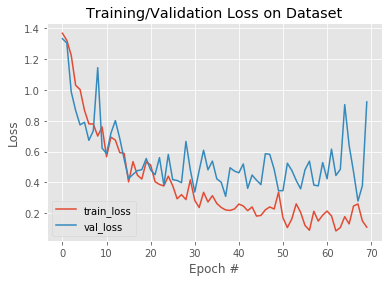

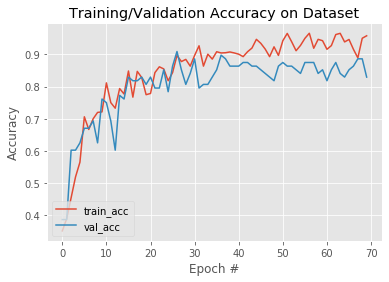

In [9]:
import matplotlib.pyplot as plt
N=NUM_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")

plt.title("Training/Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

plt.figure()
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")

plt.title("Training/Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [5]:
# test model


# load saved weights
model.load_weights(WEIGHTS_FINAL)


test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=1)

out = model.evaluate_generator(test_batches, use_multiprocessing=True)
print(list(zip(model.metrics_names,out)))

Found 88 images belonging to 4 classes.
[('loss', 0.5655600138855934), ('accuracy', 0.92045456)]


In [6]:
test_batches.reset()
Y_pred = model.predict_generator(test_batches, use_multiprocessing=True)
# print(len(Y_pred))



 Classification Report

              precision    recall  f1-score   support

   cocklebur       0.89      0.94      0.91        17
     foxtail       0.82      1.00      0.90        14
     pigweed       0.94      1.00      0.97        34
     ragweed       1.00      0.74      0.85        23

    accuracy                           0.92        88
   macro avg       0.91      0.92      0.91        88
weighted avg       0.93      0.92      0.92        88



Confusion Matrix



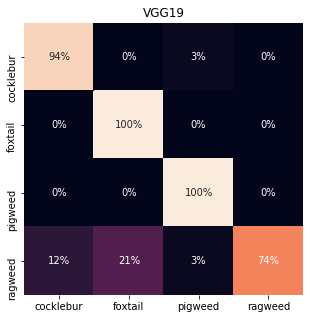

In [8]:
# for plots et al.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = np.argmax(Y_pred, axis=1)

print('\n\n Classification Report\n')
target_names = list(test_batches.class_indices.keys())
print(classification_report(list(test_batches.classes), y_pred, target_names=target_names))


print('\n\nConfusion Matrix\n')
cm = confusion_matrix(test_batches.classes, y_pred)

row_sums = cm.sum(axis=1)
cm = cm / row_sums

df_cm = pd.DataFrame(cm, index = ['cocklebur','foxtail','pigweed','ragweed'], columns = ['cocklebur','foxtail','pigweed','ragweed'])
# print(df_cm)

# flights = df_cm.pivot("month", "year", "passengers")

plt.figure(figsize = (5,5))
plt.title('VGG19')
sn.heatmap(df_cm, annot=True, fmt='0.0%', cbar=False)
plt.savefig('VGG19.png')

In [17]:
# save trained weights
model.save(WEIGHTS_FINAL)